## Sine wave

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sys

sys.path.append('./src/')

import rbfn as rbfn
import util as util
importlib.reload(rbfn)

<module 'rbfn' from './src/rbfn.py'>

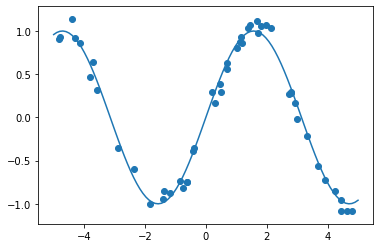

In [32]:
np.random.seed(0)
n_obs = 50
sigma_y = .1

x = np.random.uniform(-5,5,n_obs)
f = lambda x: np.sin(x)
y = f(x) + sigma_y*np.random.normal(0,1,n_obs)

x_plot = np.linspace(-5,5,100)
plt.plot(x_plot, f(x_plot))
plt.scatter(x, y)

In [33]:
importlib.reload(rbfn)
np.random.seed(1)
model = rbfn.RBFN(x=x.reshape(-1,1), y=y.reshape(-1,1), k=10, k_fixed=False)

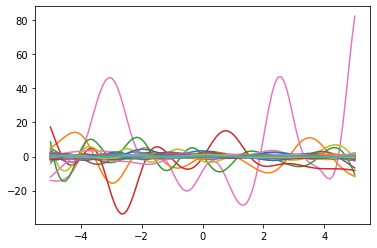

In [34]:
# Samples from prior
n_samp = 50
Y = np.zeros((n_samp, x_plot.size))
for i in range(n_samp):
    model.init_parameters()
    Y[i,:] = model.forward(x_plot.reshape(-1,1)).ravel()
    
_=plt.plot(x_plot, Y.T)

In [35]:
np.random.seed(0)

_ = model.train(n_samp = 1000, n_print = 10) # burn-in

accept, samples = model.train(n_samp = 1000, x_plot=x_plot.reshape(-1,1), n_print = 10, record=True)


sample: [100/1000]
sample: [200/1000]
sample: [300/1000]
sample: [400/1000]
sample: [500/1000]
sample: [600/1000]
sample: [700/1000]
sample: [800/1000]
sample: [900/1000]
sample: [100/1000], accept Lam: 0.750, accept mu (unif): 0.127, accept mu (norm): 0.093
sample: [200/1000], accept Lam: 0.780, accept mu (unif): 0.069, accept mu (norm): 0.184
sample: [300/1000], accept Lam: 0.747, accept mu (unif): 0.055, accept mu (norm): 0.180
sample: [400/1000], accept Lam: 0.745, accept mu (unif): 0.053, accept mu (norm): 0.195
sample: [500/1000], accept Lam: 0.760, accept mu (unif): 0.056, accept mu (norm): 0.177
sample: [600/1000], accept Lam: 0.760, accept mu (unif): 0.094, accept mu (norm): 0.195
sample: [700/1000], accept Lam: 0.749, accept mu (unif): 0.090, accept mu (norm): 0.186
sample: [800/1000], accept Lam: 0.754, accept mu (unif): 0.108, accept mu (norm): 0.198
sample: [900/1000], accept Lam: 0.752, accept mu (unif): 0.105, accept mu (norm): 0.210


In [36]:
print('Acceptance Lam: ', np.mean(accept['Lam']))
print('Acceptance mu (unif): ', np.nanmean(accept['mu_unif']))
print('Acceptance mu (norm): ', np.nanmean(accept['mu_norm']))

if model.k_fixed==False:
    print('Acceptance birth: %.3f (%d)' %(np.nanmean(accept['birth']), np.sum(np.logical_not(np.isnan(accept['birth'])))))
    print('Acceptance death: %.3f (%d)' %(np.nanmean(accept['death']), np.sum(np.logical_not(np.isnan(accept['death'])))))
    print('Acceptance split: %.3f (%d)' %(np.nanmean(accept['split']), np.sum(np.logical_not(np.isnan(accept['split'])))))
    print('Acceptance merge: %.3f (%d)' %(np.nanmean(accept['merge']), np.sum(np.logical_not(np.isnan(accept['merge'])))))
    

Acceptance Lam:  0.746
Acceptance mu (unif):  0.10456053067993366
Acceptance mu (norm):  0.21055276381909543
Acceptance birth: 0.057 (193)
Acceptance death: 0.048 (188)
Acceptance split: 0.005 (206)
Acceptance merge: 0.015 (195)


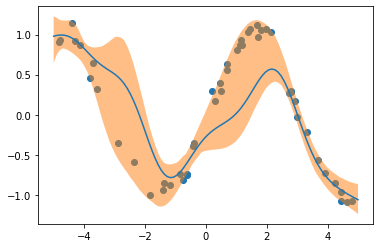

In [37]:
y_pred = np.squeeze(samples['y_plot_pred'])

ci = np.percentile(y_pred, [5, 95], axis=0)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_plot, np.mean(y_pred,0))
ax.fill_between(x_plot, ci[0,:], ci[1,:],alpha=.5)

In [63]:
import torch

log_lik_proposed = torch.tensor(-10519.9180)
log_lik_current = torch.tensor(-18720.5332)
term3 = 2.302585092994046
term4 = torch.tensor(2.3026, dtype=torch.float64)

a = torch.exp(log_lik_proposed - log_lik_current + term3 - torch.tensor(term3) - term4)

print(a.float())

if torch.rand(1) < a.float():
    print('hey')

tensor(inf)
hey


In [80]:
a=torch.tensor(float('nan')) + 4
a

tensor(nan)

In [82]:
.4 > a

tensor(0, dtype=torch.uint8)

In [79]:
torch.isnan(a)

tensor(1, dtype=torch.uint8)

In [70]:
2*np.sqrt(1/200)

0.1414213562373095

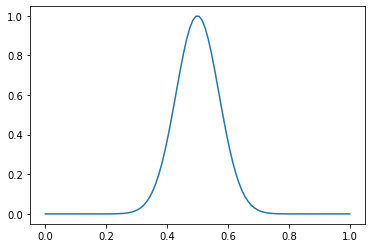

In [66]:
f = lambda x: np.exp(-0.5*200*(x-0.5)**2)

plt.plot(np.linspace(0,1,100), f(np.linspace(0,1,100)))

In [72]:
# Lam ~ Gamma(0.5 + eps1, eps2) -- represents expected number of units
eps1 = 9.5
eps2 = 1
(0.5 + eps1) / eps2

10.0

In [53]:
# sig2 ~ InverseGamma(nu_0/2, gamma_0/2) -- represents observation noise
nu_0 = 3
gamma_0 = .0049
print('sig2 mean: ', gamma_0/2 / (nu_0/2 - 1))

sig2 mean:  0.0049


In [54]:
1/.0049

204.08163265306123

In [68]:
# del2 ~ InverseGamma(alpha_del2, beta_del2) -- represents signal-to-noise ratio
alpha_del2 = 2.47
beta_del2 = 300
print('del2 mean: ', beta_del2 / (alpha_del2 - 1))

del2 mean:  204.0816326530612


In [144]:
1/.01*2

200.0

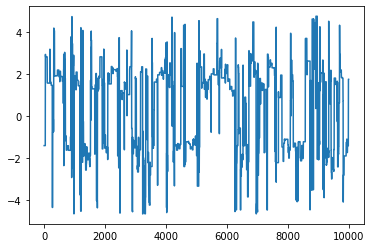

In [8]:
plt.plot(samples['mu'][:,0])

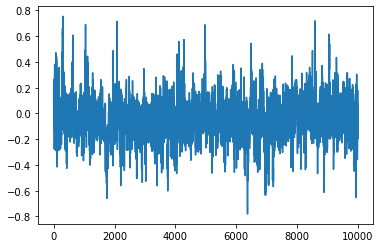

In [9]:
# b
plt.plot(samples['alpha'][:,0,0])

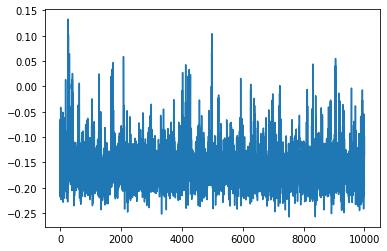

In [10]:
# beta
_=plt.plot(samples['alpha'][:,1:1+model.d,0])

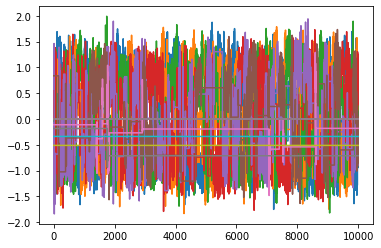

In [11]:
# a
_=plt.plot(samples['alpha'][:,1+model.d:,0])

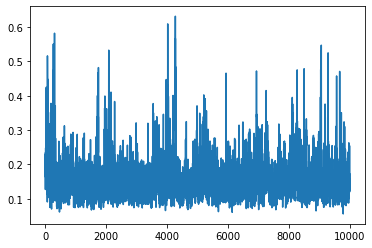

In [12]:
_=plt.plot(samples['sig2'])

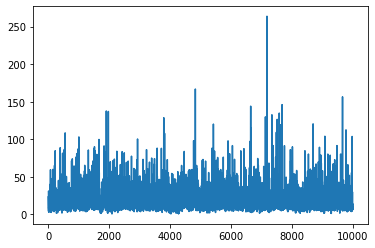

In [13]:
_=plt.plot(samples['del2'])

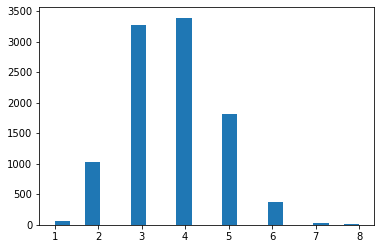

In [14]:
_=plt.hist(samples['k'], bins=20)